# Ploting Exposure Analysis

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [3]:
# read the illinois state shp data
illinois_shp = gpd.read_file('raw_il_census_tracts_shapefile/tl_2019_17_tract.shp')
illinois_shp = illinois_shp.loc[:,('GEOID','geometry')]
illinois_shp['centroid'] = illinois_shp.centroid.to_crs(epsg = 4326)
illinois_shp.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


,GEOID,geometry,centroid
0,17091011700,"POLYGON ((-87.88768 41.13594, -87.88764 41.136...",POINT (-87.87355 41.12949)
1,17091011800,"POLYGON ((-87.89410 41.14388, -87.89400 41.143...",POINT (-87.87646 41.13978)
2,17119400951,"POLYGON ((-90.11192 38.70281, -90.11128 38.703...",POINT (-90.09829 38.72763)
3,17119400952,"POLYGON ((-90.09442 38.72031, -90.09360 38.720...",POINT (-90.08180 38.72984)
4,17135957500,"POLYGON ((-89.70369 39.34803, -89.69928 39.348...",POINT (-89.60391 39.38915)


In [4]:
info_df = pd.read_csv("Statistical_Analysis/data/ct_info_cases_data.csv")[['income','POP_DENSITY']]
info_df

,income,POP_DENSITY
0,20571.874,7.059873
1,60197.261,5.838794
2,71223.484,3.772428
3,57223.811,2.777786
4,68961.929,0.128183
...,...,...
3118,68509.474,1.022809
3119,55053.534,5.213170
3120,95704.251,0.252156
3121,81429.580,0.037200


In [5]:
exposure_df = pd.read_csv("exposure_df.csv")[['GEOID','exposure1','exposure2','exposure3','exposure4']]
exposure_df["exposure1"] = np.log(1+exposure_df["exposure1"])*1000
exposure_df["exposure2"] = np.log(1+exposure_df["exposure2"])*1000
exposure_df["exposure3"] = np.log(1+exposure_df["exposure3"])*1000 
exposure_df["exposure4"] = np.log(1+exposure_df["exposure4"])*1000

lower = 0#3.733197e-02
upper = 9.84

exposure_df[exposure_df["exposure1"] < lower] = lower
exposure_df[exposure_df["exposure2"] < lower] = lower
exposure_df[exposure_df["exposure3"] < lower] = lower
exposure_df[exposure_df["exposure4"] < lower] = lower

exposure_df[exposure_df["exposure1"] > upper] = upper
exposure_df[exposure_df["exposure2"] > upper] = upper
exposure_df[exposure_df["exposure3"] > upper] = upper
exposure_df[exposure_df["exposure4"] > upper] = upper


In [6]:
# exposure_shp =  gpd.GeoDataFrame(exposure_df)
illinois_shp[['GEOID','exposure1','exposure2','exposure3','exposure4']] = exposure_df[['GEOID','exposure1','exposure2','exposure3','exposure4']]
illinois_shp[['POP_DENSITY','income']] = info_df[['POP_DENSITY','income']]
illinois_shp

,GEOID,geometry,centroid,exposure1,exposure2,exposure3,exposure4,POP_DENSITY,income
0,1.709101e+10,"POLYGON ((-87.88768 41.13594, -87.88764 41.136...",POINT (-87.87355 41.12949),0.371849,1.002684,1.959454,2.138916,7.059873,20571.874
1,1.709101e+10,"POLYGON ((-87.89410 41.14388, -87.89400 41.143...",POINT (-87.87646 41.13978),0.365485,0.985878,1.927370,2.104017,5.838794,60197.261
2,1.711940e+10,"POLYGON ((-90.11192 38.70281, -90.11128 38.703...",POINT (-90.09829 38.72763),0.569447,1.016690,2.253667,6.054866,3.772428,71223.484
3,1.711940e+10,"POLYGON ((-90.09442 38.72031, -90.09360 38.720...",POINT (-90.08180 38.72984),0.231938,0.413723,0.922515,2.516101,2.777786,57223.811
4,1.713596e+10,"POLYGON ((-89.70369 39.34803, -89.69928 39.348...",POINT (-89.60391 39.38915),0.007191,0.077081,0.119385,0.553959,0.128183,68961.929
...,...,...,...,...,...,...,...,...,...
3118,1.703700e+10,"POLYGON ((-88.73488 42.10620, -88.73483 42.106...",POINT (-88.65253 42.10661),0.007191,1.930541,3.675515,6.319460,1.022809,68509.474
3119,1.703700e+10,"POLYGON ((-88.78378 41.84907, -88.77716 41.860...",POINT (-88.73721 41.88417),0.007191,0.741312,1.413301,2.437337,5.213170,55053.534
3120,9.840000e+00,"POLYGON ((-88.78353 42.06425, -88.78350 42.064...",POINT (-88.68023 42.02216),9.840000,9.840000,9.840000,9.840000,0.252156,95704.251
3121,1.703700e+10,"POLYGON ((-88.94215 42.06505, -88.94211 42.065...",POINT (-88.86924 41.96281),0.007191,0.228631,0.434715,0.751747,0.037200,81429.580


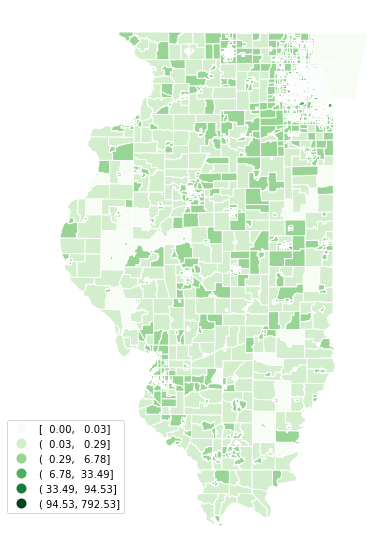

In [15]:
pop_map = illinois_shp.plot(
    column='POP_DENSITY',
    cmap='Greens',
    edgecolor='white',
    linewidth = 1,
    legend=True,
    alpha = 1, 
    scheme = 'percentiles',
#     markersize = 'POP_DENSITY',
    figsize = (10,10),
                 )

# Adjust legend location
leg = pop_map.get_legend()
leg.set_bbox_to_anchor((0.25,0.25))

pop_map.axis('off')
plt.savefig('Plots/population_map.png', dpi = 200)

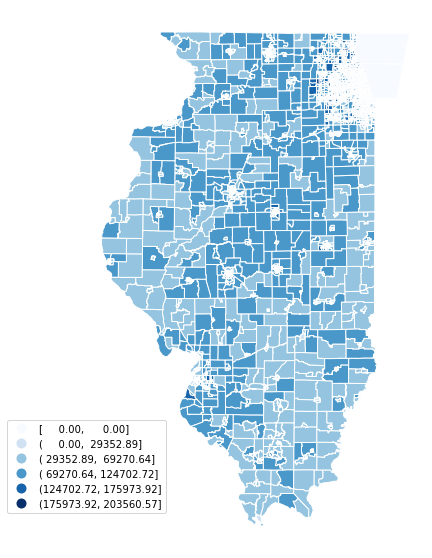

In [8]:
# https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/
income_map = illinois_shp.plot(
    column='income',
    cmap='Blues',
    edgecolor='white',
    linewidth = 1,
    legend=True,
    
    alpha = 1, 
    scheme = 'percentiles',
#     markersize = 'POP_DENSITY',
    figsize = (10,10),
                 )
# Adjust legend location
leg = income_map.get_legend()
leg.set_bbox_to_anchor((0.25,0.25))

income_map.axis('off')
plt.savefig('Plots/income_map.png', dpi = 200)

In [10]:
# https://www.youtube.com/watch?v=ff3At9NRcsg

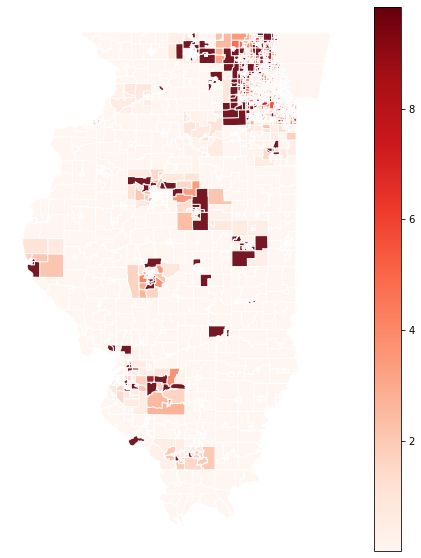

In [18]:
exposure1_map = illinois_shp.plot(
    column='exposure1',
    cmap='Reds',
    edgecolor='white',
    linewidth = 1,
    alpha = 0.9, 
    legend = True,

    figsize = (10,10),
                 )
exposure1_map.axis('off')
plt.savefig('Plots/exposure1_map.png', dpi = 200)

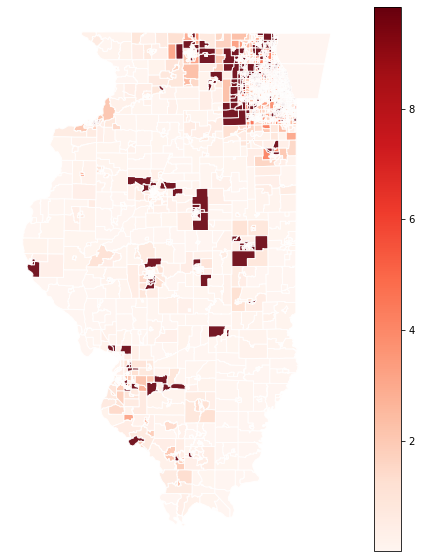

In [19]:
exposure2_map = illinois_shp.plot(
    column='exposure2',
    cmap='Reds',
    edgecolor='white',
    linewidth = 1,
    alpha = 0.9, 
#     scheme = 'percentiles',
    legend = True,
#     markersize = 'exposure1',
    figsize = (10,10)
                 )
exposure2_map.axis('off')
plt.savefig('Plots/exposure2_map.png', dpi = 200)

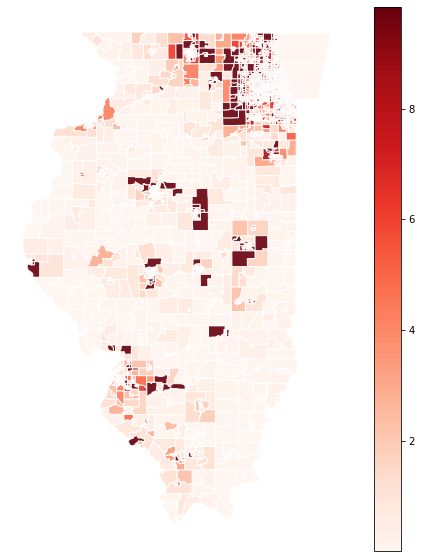

In [20]:
exposure3_map = illinois_shp.plot(
    column='exposure3',
    cmap='Reds',
    edgecolor='white',
    linewidth = 1,
    alpha = 0.9, 
#     scheme = 'percentiles',
    legend = True,
#     markersize = 'exposure1',
    figsize = (10,10),
                 )
exposure3_map.axis('off')
plt.savefig('Plots/exposure3_map.png', dpi = 200)

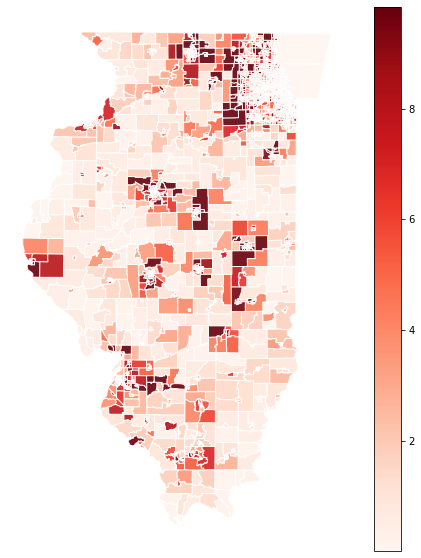

In [21]:
exposure4_map = illinois_shp.plot(
    column='exposure4',
    cmap='Reds',
    edgecolor='white',
    linewidth = 1,
    alpha = 0.9, 
#     scheme = 'percentiles',
    legend = True,
#     markersize = 'exposure1',
    figsize = (10,10),
                 )
exposure4_map.axis('off')
plt.savefig('Plots/exposure4_map.png', dpi = 200)